In [49]:
%matplotlib inline
%pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs

  Using cached https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.1.0b2-cp36-cp36m-linux_x86_64.whl size=1273380 sha256=018b8325990156d0721e4fb94d6f132e139e52617dbacdd600cddee759017ebe
  Stored in directory: /tmp/pip-ephem-wheel-cache-vtuz59f0/wheels/d3/a5/a8/411bc2d0939f2cc9d17f34f0d3457043c68e14a98b91fd8301
Successfully built scikit-learn-extra


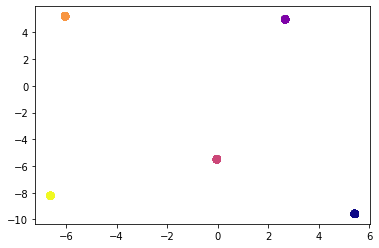

In [107]:
#Генерация датасетов
#1. Линейно разделимые множества (с расстоянием между группами в 10^3 раз больше, чем диаметр группы)
X1, Y1 = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=0.001, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, s=50, cmap='plasma')
plt.show()

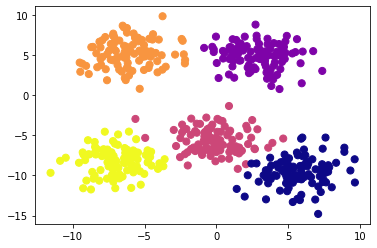

In [108]:
#2. Линейно разделимые множества (группы расположены близко или касаются друг друга)
X2, Y2 = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=1.75, random_state=10)
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, s=50, cmap='plasma')
plt.show()

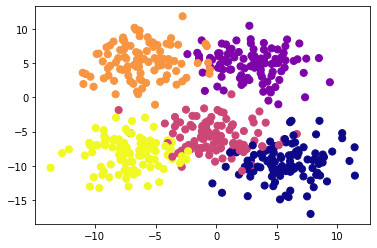

In [109]:
#3. Линейно неразделимое множество (средняя площадь пересечения классов 10-20%)
X3, Y3 = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=2.5, random_state=10)
plt.scatter(X3[:, 0], X3[:, 1], c=Y3, s=50, cmap='plasma')
plt.show()

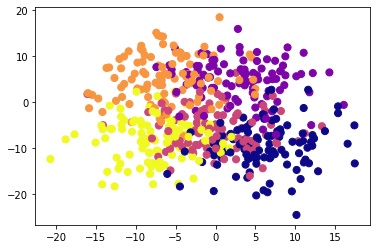

In [110]:
#4. Линейно неразделимое множество (средняя площадь пересечения классов 50-70%)
X4, Y4 = make_blobs(n_samples=500, n_features=2, centers=5, cluster_std=5, random_state=10)
plt.scatter(X4[:, 0], X4[:, 1], c=Y4, s=50, cmap='plasma')
plt.show()

In [111]:
#5. Эталонный датасет Boston
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}
x_train = x_train/255.0
x_train_flat = x_train.reshape(-1,3072)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]
from sklearn.model_selection import train_test_split
X5, x5, Y5, y5 = train_test_split(x_train_flat, y_train, train_size=0.05, random_state=2, stratify=y_train)
x = pd.DataFrame(X5, columns=feat_cols)
x['object'] = Y5
Y5 = Y5.reshape(2500)
x.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel3033,pixel3034,pixel3035,pixel3036,pixel3037,pixel3038,pixel3039,pixel3040,pixel3041,pixel3042,pixel3043,pixel3044,pixel3045,pixel3046,pixel3047,pixel3048,pixel3049,pixel3050,pixel3051,pixel3052,pixel3053,pixel3054,pixel3055,pixel3056,pixel3057,pixel3058,pixel3059,pixel3060,pixel3061,pixel3062,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,object
1200,0.196078,0.427451,0.772549,0.200000,0.431373,0.772549,0.203922,0.439216,0.780392,0.211765,0.447059,0.788235,0.223529,0.454902,0.800000,0.231373,0.458824,0.807843,0.235294,0.462745,0.811765,0.239216,0.466667,0.815686,0.243137,0.470588,0.819608,0.247059,0.474510,0.823529,0.243137,0.478431,0.827451,0.243137,0.482353,0.827451,0.243137,0.482353,0.827451,0.247059,...,0.592157,0.482353,0.305882,0.615686,0.501961,0.325490,0.592157,0.486275,0.313725,0.572549,0.474510,0.301961,0.611765,0.521569,0.345098,0.596078,0.513725,0.337255,0.658824,0.584314,0.403922,0.666667,0.596078,0.411765,0.682353,0.615686,0.431373,0.647059,0.588235,0.407843,0.623529,0.568627,0.396078,0.619608,0.572549,0.403922,0.662745,0.611765,0.458824,9
2175,0.003922,0.396078,0.592157,0.011765,0.400000,0.592157,0.011765,0.400000,0.592157,0.011765,0.400000,0.584314,0.011765,0.392157,0.584314,0.011765,0.388235,0.592157,0.019608,0.388235,0.580392,0.023529,0.388235,0.568627,0.019608,0.403922,0.588235,0.023529,0.415686,0.600000,0.035294,0.407843,0.603922,0.047059,0.411765,0.607843,0.050980,0.415686,0.619608,0.050980,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9
2306,0.439216,0.474510,0.501961,0.431373,0.466667,0.494118,0.431373,0.466667,0.494118,0.443137,0.470588,0.494118,0.423529,0.443137,0.462745,0.415686,0.435294,0.458824,0.443137,0.462745,0.486275,0.431373,0.450980,0.470588,0.439216,0.458824,0.482353,0.447059,0.462745,0.486275,0.419608,0.443137,0.466667,0.388235,0.403922,0.423529,0.392157,0.392157,0.403922,0.407843,...,0.749020,0.752941,0.752941,0.752941,0.756863,0.756863,0.752941,0.752941,0.756863,0.752941,0.752941,0.756863,0.760784,0.764706,0.764706,0.760784,0.760784,0.768627,0.749020,0.749020,0.764706,0.756863,0.756863,0.772549,0.752941,0.749020,0.768627,0.741176,0.745098,0.760784,0.741176,0.756863,0.768627,0.741176,0.756863,0.768627,0.745098,0.760784,0.772549,4
699,0.290196,0.439216,0.709804,0.282353,0.431373,0.709804,0.282353,0.427451,0.721569,0.274510,0.419608,0.721569,0.266667,0.419608,0.713725,0.266667,0.427451,0.717647,0.278431,0.435294,0.737255,0.278431,0.435294,0.749020,0.290196,0.447059,0.768627,0.298039,0.462745,0.764706,0.301961,0.470588,0.764706,0.298039,0.462745,0.776471,0.325490,0.498039,0.800000,0.384314,...,0.180392,0.231373,0.286275,0.109804,0.152941,0.215686,0.098039,0.141176,0.211765,0.098039,0.141176,0.223529,0.098039,0.137255,0.231373,0.129412,0.176471,0.266667,0.141176,0.207843,0.278431,0.113725,0.180392,0.258824,0.152941,0.215686,0.309804,0.239216,0.301961,0.403922,0.227451,0.294118,0.400000,0.160784,0.243137,0.337255,0.164706,0.247059,0.329412,8
1411,0.890196,0.392157,0.643137,0.886275,0.415686,0.654902,0.921569,0.498039,0.721569,0.945098,0.580392,0.780392,0.929412,0.615686,0.792157,0.933333,0.556863,0.733333,0.898039,0.372549,0.580392,0.898039,0.337255,0.556863,0.933333,0.466667,0.666667,0.968627,0.549020,0.756863,0.972549,0.537255,0.764706,0.894118,0.356863,0.556863,0.850980,0.223529,0.415686,0.917647,...,0.984314,0.549020,0.768627,0.941

In [112]:
#6. Эталонный датасет {2}
from sklearn.datasets import load_wine
wine = load_wine()
wine_data = wine.data
wine_labels = wine.target
wine_labels.shape
wine_labels = np.reshape(wine_labels,(178,1))
Y6 = wine_labels
final_wine_data = np.concatenate([wine_data,wine_labels],axis=1)
wine_dataset = pd.DataFrame(final_wine_data)
wine_features = wine.feature_names
wine_features_labels = np.append(wine_features,'wine_type')
wine_dataset.columns = wine_features_labels
Y6 = Y6.reshape(178)
wine_dataset.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0,2.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,0.0
48,14.10,2.02,2.40,18.8,103.0,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060.0,0.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0,1.0
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,0.0


Adjusted Rand index: 1.0
Adjusted Mutual Information: 1.0
V-measure: 1.0
Fowlkes-Mallows scores: 1.0


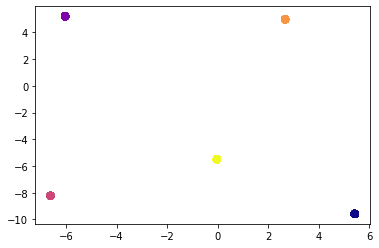

Adjusted Rand index: 0.9704757994930239
Adjusted Mutual Information: 0.9665312714652747
V-measure: 0.9668682033795241
Fowlkes-Mallows scores: 0.9763367736922112


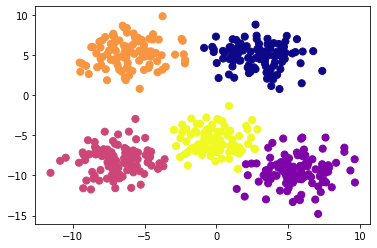

Adjusted Rand index: 0.8584694558419338
Adjusted Mutual Information: 0.8512133021402687
V-measure: 0.8527112348105139
Fowlkes-Mallows scores: 0.886569882120108


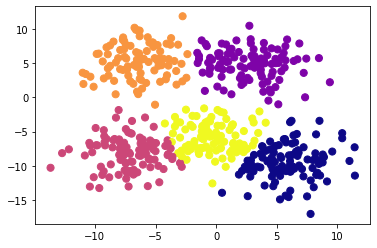

Adjusted Rand index: 0.32870347498382396
Adjusted Mutual Information: 0.4058515991619388
V-measure: 0.4118615404037937
Fowlkes-Mallows scores: 0.46386287649028607


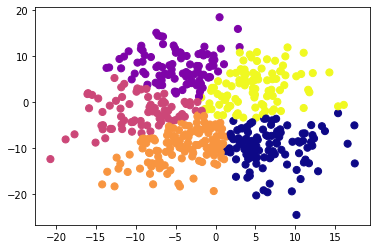

In [113]:
from sklearn import metrics
#Реализация KMeans с Евклидовым расстоянием
from sklearn.cluster import KMeans
for i in range(1,5):
  if (i==1):
    km = KMeans(5)
    X = X1
    Y = Y1
  elif (i==2):
    km = KMeans(5)
    X = X2
    Y = Y2
  elif (i==3):
    km = KMeans(5)
    X = X3
    Y = Y3
  elif (i==4):
    km = KMeans(5)
    X = X4
    Y = Y4
  km.fit(X)
  Y_pred = km.labels_
  #Оценка
  print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
  print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
  print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
  print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))
  plt.scatter(X[:,0],X[:,1], c=Y_pred, s=50, cmap='plasma')
  plt.show()

In [114]:
km = KMeans(10)
X = X5
Y = Y5
km.fit(X)
Y_pred = km.labels_
#Оценка
print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

km = KMeans(3)
X = final_wine_data
Y = Y6
km.fit(X)
Y_pred = km.labels_
#Оценка
print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

Adjusted Rand index: 0.051747583619712476
Adjusted Mutual Information: 0.09991591865409738
V-measure: 0.10635584335882119
Fowlkes-Mallows scores: 0.14967593742850757
Adjusted Rand index: 0.37111371823084754
Adjusted Mutual Information: 0.42268666427661206
V-measure: 0.4287568597645355
Fowlkes-Mallows scores: 0.5835370218944976


Adjusted Rand index: 1.0
Adjusted Mutual Information: 1.0
V-measure: 1.0
Fowlkes-Mallows scores: 1.0


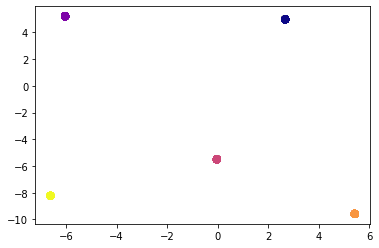

Adjusted Rand index: 0.7095523611293514
Adjusted Mutual Information: 0.8339255332921829
V-measure: 0.8356773091696867
Fowlkes-Mallows scores: 0.7803251072393849


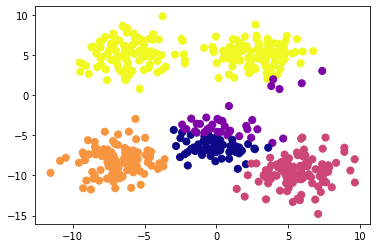

Adjusted Rand index: 0.6134424891936615
Adjusted Mutual Information: 0.7191747711613297
V-measure: 0.7220977984532592
Fowlkes-Mallows scores: 0.6990093817263848


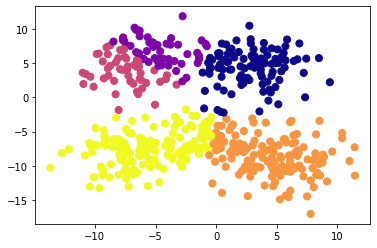

Adjusted Rand index: 0.41342988966155736
Adjusted Mutual Information: 0.4389350802189522
V-measure: 0.4446119299894437
Fowlkes-Mallows scores: 0.531667936251227


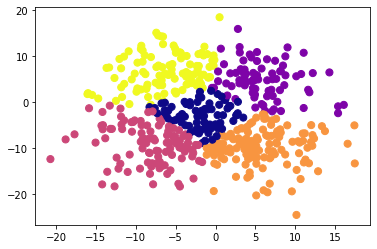

In [115]:
#Реализация KMedoids (неирархического метода) с Евклидовым расстоянием
from sklearn_extra.cluster import KMedoids
for i in range(1,5):
  if (i==1):
    km = KMedoids(5, metric='euclidean')
    X = X1
    Y = Y1
  elif (i==2):
    km = KMedoids(5, metric='euclidean')
    X = X2
    Y = Y2
  elif (i==3):
    km = KMedoids(5, metric='euclidean')
    X = X3
    Y = Y3
  elif (i==4):
    km = KMedoids(5, metric='euclidean')
    X = X4
    Y = Y4
  km.fit(X)
  Y_pred = km.labels_
  #Оценка
  print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
  print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
  print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
  print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))
  plt.scatter(X[:,0],X[:,1], c=Y_pred, s=50, cmap='plasma')
  plt.show()

In [116]:
 km = KMedoids(10, metric='euclidean')
 X = X5
 Y = Y5
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

 km = KMedoids(3, metric='euclidean')
 X = final_wine_data
 Y = Y6
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

Adjusted Rand index: 0.04442561320239256
Adjusted Mutual Information: 0.0736956459850828
V-measure: 0.08050516750126832
Fowlkes-Mallows scores: 0.15225921513196594
Adjusted Rand index: 0.39412433717671946
Adjusted Mutual Information: 0.429206238625857
V-measure: 0.43519421216392956
Fowlkes-Mallows scores: 0.5979119919057084


Adjusted Rand index: 0.7173222869303654
Adjusted Mutual Information: 0.8635858984402559
V-measure: 0.865027074265803
Fowlkes-Mallows scores: 0.7876416826010276


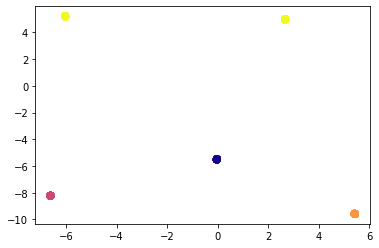

Adjusted Rand index: 0.9801444302180834
Adjusted Mutual Information: 0.9753597427933809
V-measure: 0.9756077706624944
Fowlkes-Mallows scores: 0.9840846952465871


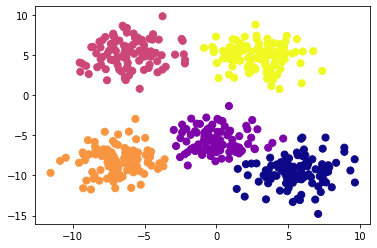

Adjusted Rand index: 0.8454221481583818
Adjusted Mutual Information: 0.836664405567768
V-measure: 0.8383088142751298
Fowlkes-Mallows scores: 0.8761130489551592


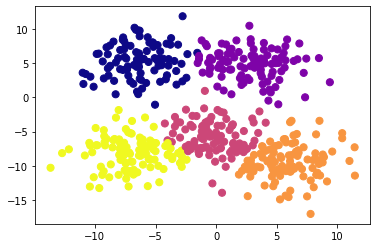

Adjusted Rand index: 0.36079229429925075
Adjusted Mutual Information: 0.41215364634569596
V-measure: 0.41809746434230766
Fowlkes-Mallows scores: 0.4893620161839927


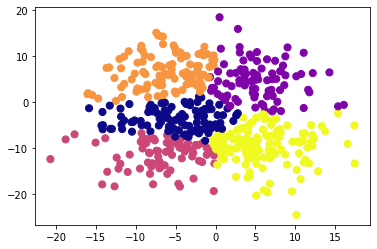

In [117]:
#Реализация KMedoids (неирархического метода) с манхэттенским расстоянием
from sklearn_extra.cluster import KMedoids
for i in range(1,5):
  if (i==1):
    km = KMedoids(5, metric='manhattan')
    X = X1
    Y = Y1
  elif (i==2):
    km = KMedoids(5, metric='manhattan')
    X = X2
    Y = Y2
  elif (i==3):
    km = KMedoids(5, metric='manhattan')
    X = X3
    Y = Y3
  elif (i==4):
    km = KMedoids(5, metric='manhattan')
    X = X4
    Y = Y4
  km.fit(X)
  Y_pred = km.labels_
  #Оценка
  print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
  print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
  print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
  print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))
  plt.scatter(X[:,0],X[:,1], c=Y_pred, s=50, cmap='plasma')
  plt.show()

In [118]:
 km = KMedoids(10, metric='manhattan')
 X = X5
 Y = Y5
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

 km = KMedoids(3, metric='manhattan')
 X = final_wine_data
 Y = Y6
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

Adjusted Rand index: 0.04081025812192728
Adjusted Mutual Information: 0.06895208744048961
V-measure: 0.07580614110427789
Fowlkes-Mallows scores: 0.15145396207203643
Adjusted Rand index: 0.38377408333176066
Adjusted Mutual Information: 0.41709475557911374
V-measure: 0.42320161237748316
Fowlkes-Mallows scores: 0.5904786903903695


Adjusted Rand index: 1.0
Adjusted Mutual Information: 1.0
V-measure: 1.0
Fowlkes-Mallows scores: 1.0


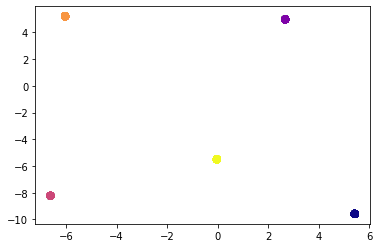

Adjusted Rand index: 0.9657203741680627
Adjusted Mutual Information: 0.9626471248938687
V-measure: 0.9630231871810118
Fowlkes-Mallows scores: 0.9725269975128806


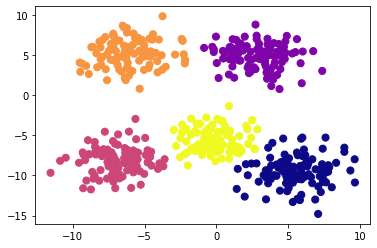

Adjusted Rand index: 0.8161335358377529
Adjusted Mutual Information: 0.8363438886652013
V-measure: 0.8379998969874771
Fowlkes-Mallows scores: 0.853235190369254


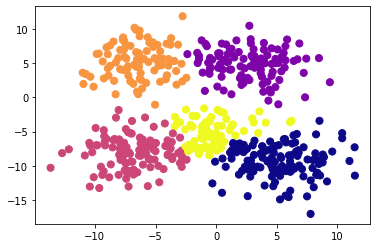

Adjusted Rand index: 0.3080198550860274
Adjusted Mutual Information: 0.3791456683532891
V-measure: 0.3854749136287574
Fowlkes-Mallows scores: 0.45042396604593476


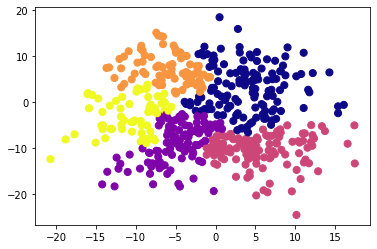

In [119]:
#Реализация иерархического агломеративного метода с евклидовым расстоянием
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
for i in range(1,5):
  if (i==1):
    km = AgglomerativeClustering(5, affinity='euclidean')
    X = X1
    Y = Y1
  elif (i==2):
    km = AgglomerativeClustering(5, affinity='euclidean')
    X = X2
    Y = Y2
  elif (i==3):
    km = AgglomerativeClustering(5, affinity='euclidean')
    X = X3
    Y = Y3
  elif (i==4):
    km = AgglomerativeClustering(5, affinity='euclidean')
    X = X4
    Y = Y4
  km.fit(X)
  Y_pred = km.labels_
  #Оценка
  print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
  print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
  print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
  print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))
  plt.scatter(X[:,0],X[:,1], c=Y_pred, s=50, cmap='plasma')
  plt.show()

In [120]:
 km = AgglomerativeClustering(10, affinity='euclidean')
 X = X5
 Y = Y5
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

 km = AgglomerativeClustering(3, affinity='euclidean')
 X = final_wine_data
 Y = Y6
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

Adjusted Rand index: 0.03842531270909816
Adjusted Mutual Information: 0.08217578569744025
V-measure: 0.08883901876703353
Fowlkes-Mallows scores: 0.14441672486901896
Adjusted Rand index: 0.36840191587483156
Adjusted Mutual Information: 0.4098675056576439
V-measure: 0.4160766539899294
Fowlkes-Mallows scores: 0.5821221849687703


Adjusted Rand index: 1.0
Adjusted Mutual Information: 1.0
V-measure: 1.0
Fowlkes-Mallows scores: 1.0


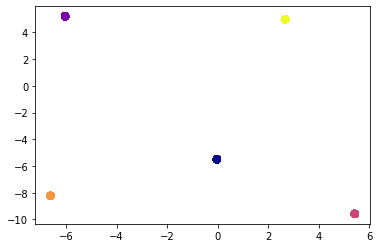

Adjusted Rand index: 0.9459868276801896
Adjusted Mutual Information: 0.9419983451465825
V-measure: 0.9425823581794426
Fowlkes-Mallows scores: 0.9567153506312787


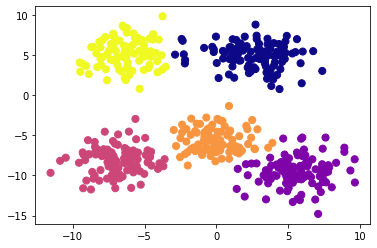

Adjusted Rand index: 0.6681974763065153
Adjusted Mutual Information: 0.729406299523971
V-measure: 0.7321664661700135
Fowlkes-Mallows scores: 0.7371121033781235


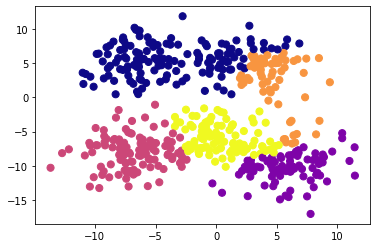

Adjusted Rand index: 0.31734493393593693
Adjusted Mutual Information: 0.39109722355187015
V-measure: 0.39753631718229615
Fowlkes-Mallows scores: 0.4690018232454751


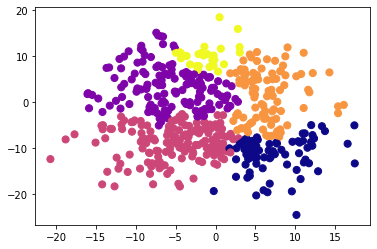

In [121]:
#Реализация иерархического агломеративного метода с манхэттенским расстоянием
from sklearn.cluster import AgglomerativeClustering
for i in range(1,5):
  if (i==1):
    km = AgglomerativeClustering(5, affinity='manhattan', linkage='complete')
    X = X1
    Y = Y1
  elif (i==2):
    km = AgglomerativeClustering(5, affinity='manhattan', linkage='complete')
    X = X2
    Y = Y2
  elif (i==3):
    km = AgglomerativeClustering(5, affinity='manhattan', linkage='complete')
    X = X3
    Y = Y3
  elif (i==4):
    km = AgglomerativeClustering(5, affinity='manhattan', linkage='complete')
    X = X4
    Y = Y4
  km.fit(X)
  Y_pred = km.labels_
  #Оценка
  print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
  print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
  print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
  print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))
  plt.scatter(X[:,0],X[:,1], c=Y_pred, s=50, cmap='plasma')
  plt.show()

In [122]:
 km = AgglomerativeClustering(10, affinity='manhattan', linkage='complete')
 X = X5
 Y = Y5
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

 km = AgglomerativeClustering(3, affinity='manhattan', linkage='complete')
 X = final_wine_data
 Y = Y6
 km.fit(X)
 Y_pred = km.labels_
 #Оценка
 print("Adjusted Rand index: {0}".format(metrics.adjusted_rand_score(Y, Y_pred)))
 print("Adjusted Mutual Information: {0}".format(metrics.adjusted_mutual_info_score(Y, Y_pred)))
 print("V-measure: {0}".format(metrics.v_measure_score(Y, Y_pred)))
 print("Fowlkes-Mallows scores: {0}".format(metrics.fowlkes_mallows_score(Y, Y_pred)))

Adjusted Rand index: 0.034675274203874396
Adjusted Mutual Information: 0.06858499674469971
V-measure: 0.07600576908177942
Fowlkes-Mallows scores: 0.15567980642176885
Adjusted Rand index: 0.33051987017621687
Adjusted Mutual Information: 0.4225593113222621
V-measure: 0.42868261149557974
Fowlkes-Mallows scores: 0.560578271374596
